In [6]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached xgboost-3.0.4-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------------------ --------------------- 5.0/11.0 MB 25.7 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 28.7 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 18.4 MB/s  0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ------------------- -------------------- 6.3/12.8 MB 31.1 MB/s eta 0:00:01
   ----------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [22]:
# 1. Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# 2. Carregar os dados
file_path = "desafio_indicium_imdb (2).csv.csv"  # coloque o caminho correto do arquivo
df = pd.read_csv(file_path)

In [25]:
# 3. Visão geral dos dados
print("Dimensão do dataset:", df.shape)
print("\nColunas do dataset:", df.columns.tolist())
print("\nDados iniciais:")
display(df.head())

Dimensão do dataset: (999, 16)

Colunas do dataset: ['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']

Dados iniciais:


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [26]:
# 4. Limpeza de colunas numéricas
# Remover coluna "Unnamed: 0" (apenas índice)
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Transformar Released_Year em numérico
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")

# Transformar Runtime em minutos (ex: '142 min' -> 142)
df["Runtime"] = df["Runtime"].str.replace(" min", "").astype(float)

# Transformar Gross em número (remover vírgulas)
df["Gross"] = df["Gross"].str.replace(",", "", regex=True).astype(float)

In [27]:
# 5. Estatísticas descritivas
print("\nEstatísticas numéricas:")
display(df.describe())



Estatísticas numéricas:


,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,998.000000,999.000000,999.000000,842.000000,9.990000e+02,8.300000e+02
mean,1991.214429,122.871872,7.947948,77.969121,2.716214e+05,6.807319e+07
std,23.308539,28.101227,0.272290,12.383257,3.209126e+05,1.098134e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,3.600000e+01
25%,1976.000000,103.000000,7.700000,70.000000,5.547150e+04,3.245338e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.383560e+05,2.345744e+07
75%,2009.000000,137.000000,8.100000,87.000000,3.731675e+05,8.087634e+07
max,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


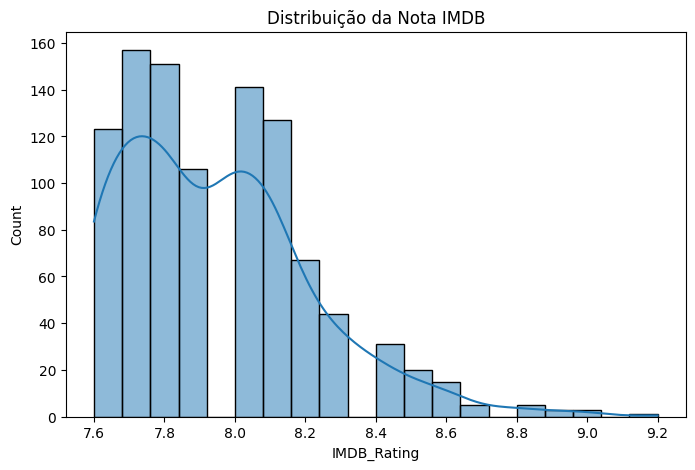

In [28]:
# 6. Distribuição da nota do IMDB
plt.figure(figsize=(8,5))
sns.histplot(df["IMDB_Rating"], bins=20, kde=True)
plt.title("Distribuição da Nota IMDB")
plt.show()

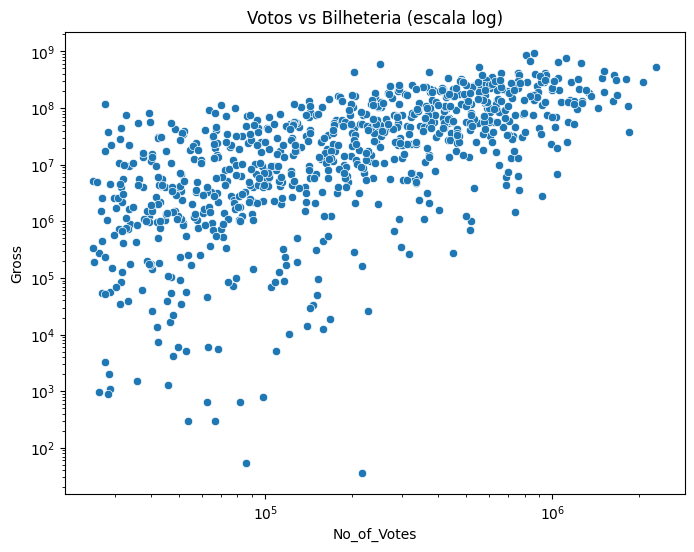

In [29]:
# 7. Relação entre número de votos e bilheteria
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="No_of_Votes", y="Gross")
plt.xscale("log")
plt.yscale("log")
plt.title("Votos vs Bilheteria (escala log)")
plt.show()

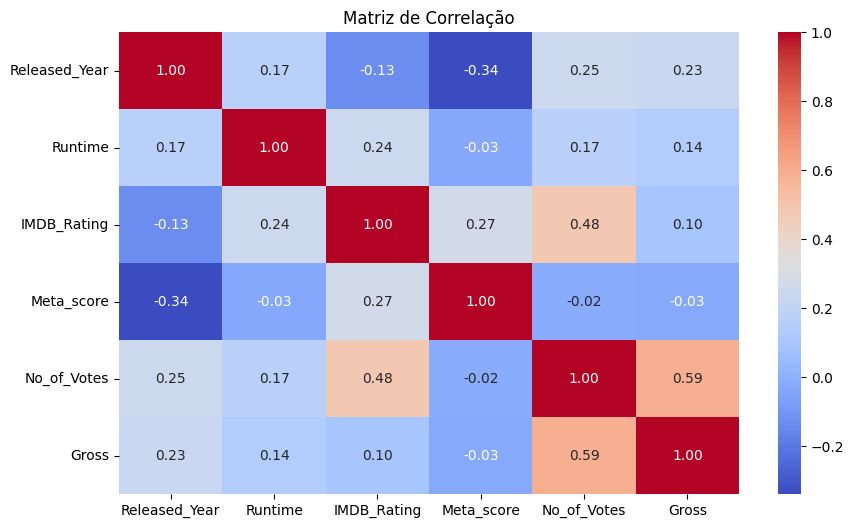

In [30]:
# 8. Correlação entre variáveis numéricas
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [31]:
# 9. Top 10 filmes por IMDB_Rating
top_movies = df.sort_values(by="IMDB_Rating", ascending=False).head(10)
print("\nTop 10 filmes por IMDB:")
display(top_movies[["Series_Title", "Released_Year", "IMDB_Rating", "Meta_score", "No_of_Votes"]])


Top 10 filmes por IMDB:


,Series_Title,Released_Year,IMDB_Rating,Meta_score,No_of_Votes
0,The Godfather,1972.0,9.2,100.0,1620367
1,The Dark Knight,2008.0,9.0,84.0,2303232
2,The Godfather: Part II,1974.0,9.0,90.0,1129952
3,12 Angry Men,1957.0,9.0,96.0,689845
4,The Lord of the Rings: The Return of the King,2003.0,8.9,94.0,1642758
5,Pulp Fiction,1994.0,8.9,94.0,1826188
6,Schindler's List,1993.0,8.9,94.0,1213505
7,Inception,2010.0,8.8,74.0,2067042
8,Fight Club,1999.0,8.8,66.0,1854740
9,The Lord of the Rings: The Fellowship of the Ring,2001.0,8.8,92.0,1661481


In [32]:
# Previsão da Nota IMDB
# ==============================================
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [33]:
# 1. Seleção das variáveis
features = ["Released_Year", "Runtime", "Genre", "Meta_score", "No_of_Votes", "Gross"]
target = "IMDB_Rating"

df_model = df[features + [target]].dropna()

In [34]:
# 2. Separar X (features) e y (target)
X = df_model.drop(columns=[target])
y = df_model[target]


In [35]:
# 3. Pré-processamento: transformar "Genre" em variáveis dummies (one-hot)
preprocess = ColumnTransformer([
    ("genre", OneHotEncoder(handle_unknown="ignore"), ["Genre"])
], remainder="passthrough")

In [36]:
# 4. Modelo (Random Forest)
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("regressor", RandomForestRegressor(n_estimators=200, random_state=42))
])

In [37]:
# 5. Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# 6. Treinamento
model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('genre', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [41]:
# CORRIGINDO ERRO NA BOBLIOTECA

In [42]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [44]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 7. Avaliação
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # raiz quadrada do MSE
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)


RMSE: 0.19443299188495108
R²: 0.5302893949936207


In [45]:
# 8. Exemplo: previsão para "The Shawshank Redemption"
novo_filme = pd.DataFrame([{
    'Released_Year': 1994,
    'Runtime': 142,
    'Genre': 'Drama',
    'Meta_score': 80.0,
    'No_of_Votes': 2343110,
    'Gross': 28341469
}])

predicao = model.predict(novo_filme)
print("\nPrevisão da nota IMDB para 'The Shawshank Redemption':", round(predicao[0], 2))


Previsão da nota IMDB para 'The Shawshank Redemption': 8.8


In [46]:
import joblib

# salvar modelo em arquivo .pkl
joblib.dump(model, "modelo_imdb.pkl")

print("Modelo salvo em 'modelo_imdb.pkl'")


Modelo salvo em 'modelo_imdb.pkl'
